## Assignment: 12.2 Term Project - Evaluating the Impact of Home/Away on NHL Performance
* Author: Fahad "CacheDinar" Ali
* Date: Saturday, November 16th, 2024
* Script: Analyzing how home/away affects NHL player stats.

# Introduction

In the world of sports analytics, understanding the factors that impact player performance is essential for strategic decision-making. For NHL players, one critical factor is **Time on Ice (TOI)**, which measures the total time a player spends actively engaged in the game. This project explores how TOI affects player performance metrics, specifically focusing on **goals** and **assists** as key indicators of offensive impact.

The primary research question guiding this analysis is: *Does increased TOI correlate with higher goals and assists, and to what extent can TOI predict a player's performance in these metrics?* By analyzing data on player statistics, this study aims to quantify the relationship between TOI and performance, using various statistical methods, including **histogram analysis**, **PMF**, **CDF**, **correlation**, and **regression**. These techniques provide insights into how TOI influences scoring and assist patterns among NHL players, with the goal of identifying significant trends and making data-driven conclusions about player usage and productivity.

Ultimately, this project seeks to contribute to the field of sports analytics by offering a deeper understanding of how TOI affects performance, while highlighting areas for future research, such as the potential effects of contextual factors like home versus away games or power play time on player performance.


###  Import Required Libraries

In [106]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats


### Loading the Dataset

In [110]:
# Load dataset
df_5v5 = pd.read_csv(r"C:\Users\cache\OneDrive\Documents\DSC530_ExploratoryDataAnalysis\WEEK 12\Player Season Totals - Natural Stat Trick_5v5.csv")

# Check the first few rows of the data to confirm it loaded correctly
df_5v5.head()


,Unnamed: 0,Player,Team,Position,GP,TOI,Goals,Total Assists,First Assists,Second Assists,...,Misconduct,Penalties Drawn,Giveaways,Takeaways,Hits,Hits Taken,Shots Blocked,Faceoffs Won,Faceoffs Lost,Faceoffs %
0,356,Kirill Kaprizov,MIN,L,16,270.016667,3,14,11,3,...,0,3,23,4,4,12,5,0,0,-
1,567,Connor McMichael,WSH,C,16,199.233333,11,5,4,1,...,0,1,6,4,7,14,8,4,4,50.00
2,255,Sam Reinhart,FLA,C,17,235.883333,6,9,6,3,...,0,2,16,5,15,17,8,24,38,38.71
3,322,Dylan Strome,WSH,C,16,207.700000,5,10,4,6,...,0,2,12,3,2,4,10,93,80,53.76
4,4,Alex Ovechkin,WSH,L,16,193.916667,7,7,4,3,...,0,0,6,4,39,8,2,0,0,-


 ### Inspect the Dataset

In [ ]:
# Display column names and data types
print(df_5v5.columns)

# Quick summary of the dataset
df_5v5.info()


### Setting the Research Focus


* Position-Based Performance: Comparing stats like Goals, Total Assists, and Shots across player positions.
* Team-Based Trends: Analyzing team-wise performance for metrics such as Goals and Total Assists.
* Time on Ice (TOI) and Performance: Exploring how time on ice affects key stats like goals and assists.

### Position-Based Analysis


#### - Goals by Position

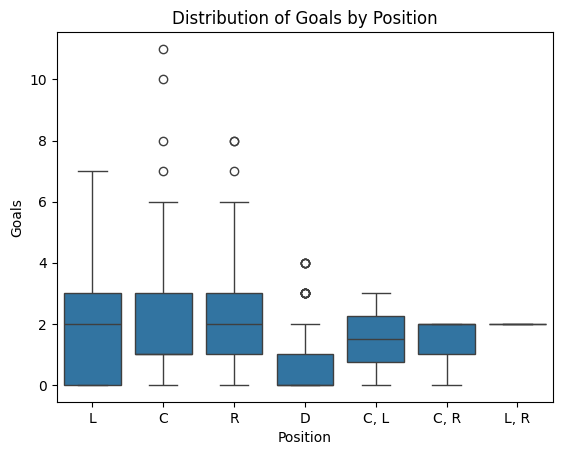

In [118]:
# Boxplot for Goals by Position
sns.boxplot(x='Position', y='Goals', data=df_5v5)
plt.title("Distribution of Goals by Position")
plt.xlabel("Position")
plt.ylabel("Goals")
plt.show()


### - Assists by Position

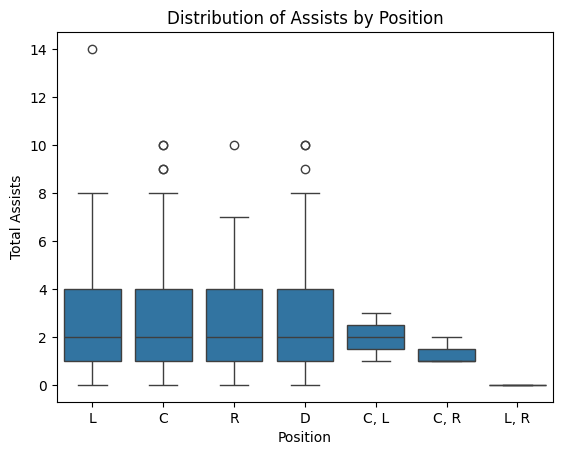

In [123]:
# Boxplot for Total Assists by Position
sns.boxplot(x='Position', y='Total Assists', data=df_5v5)
plt.title("Distribution of Assists by Position")
plt.xlabel("Position")
plt.ylabel("Total Assists")
plt.show()


### - Shots by Position


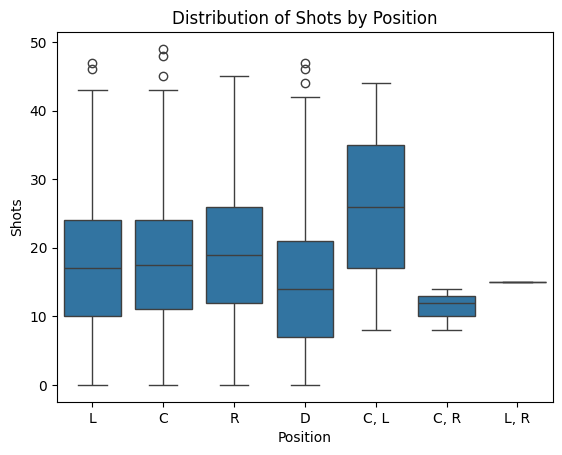

In [126]:
# Boxplot for Shots by Position
sns.boxplot(x='Position', y='Shots', data=df_5v5)
plt.title("Distribution of Shots by Position")
plt.xlabel("Position")
plt.ylabel("Shots")
plt.show()


### Team-Based Analysis

#### - Goals by Team



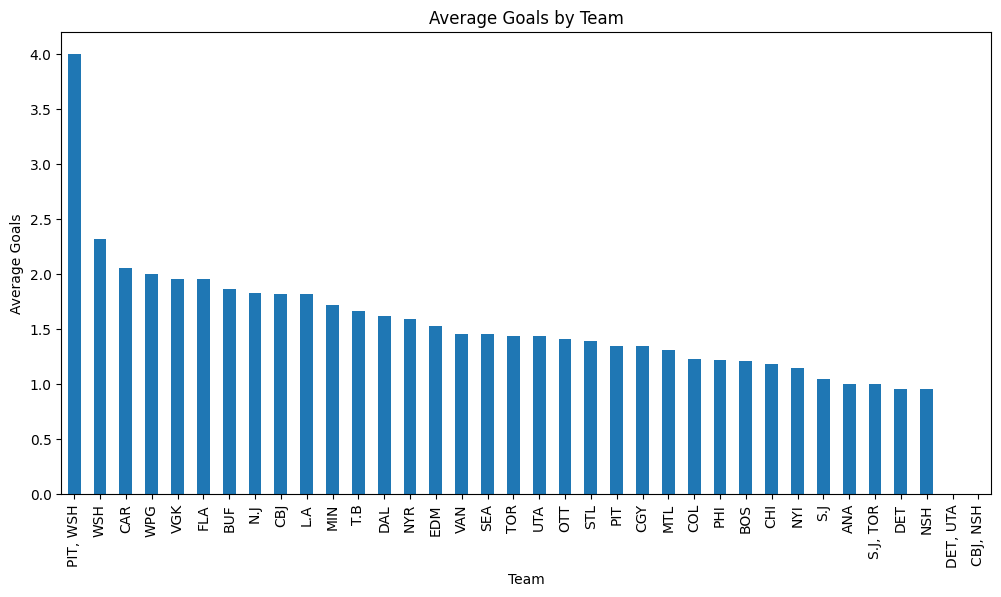

In [131]:
# Calculate average goals per team and plot
avg_goals_team = df_5v5.groupby('Team')['Goals'].mean().sort_values(ascending=False)
avg_goals_team.plot(kind='bar', figsize=(12, 6))
plt.title("Average Goals by Team")
plt.xlabel("Team")
plt.ylabel("Average Goals")
plt.show()


#### - Assists by Team

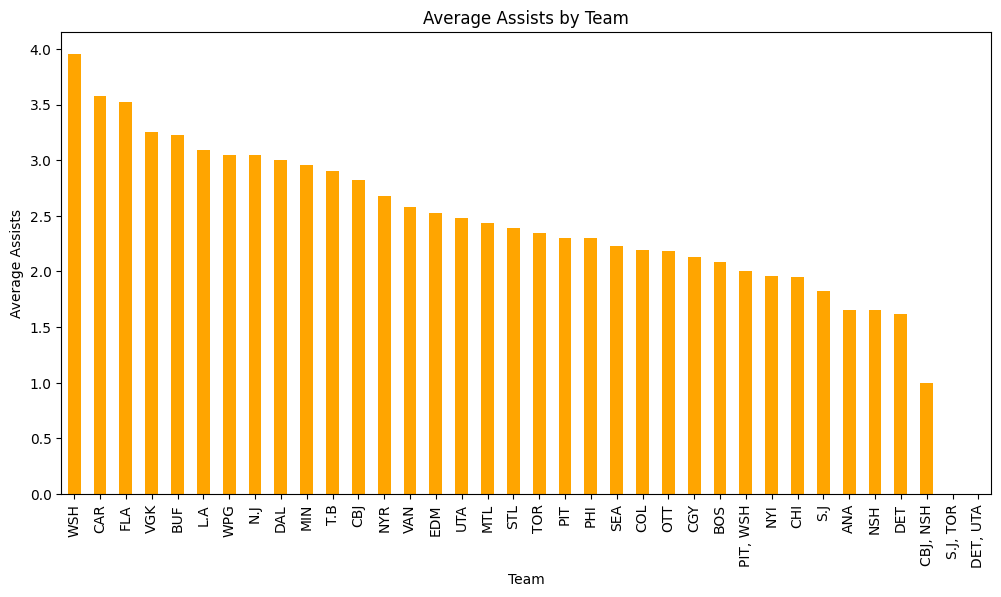

In [141]:
# Calculate average assists per team and plot
avg_assists_team = df_5v5.groupby('Team')['Total Assists'].mean().sort_values(ascending=False)
avg_assists_team.plot(kind='bar', figsize=(12, 6), color='orange')
plt.title("Average Assists by Team")
plt.xlabel("Team")
plt.ylabel("Average Assists")
plt.show()


### Dataset and Variables

#### - 5 quantitative variables
- **Goals**: The total number of goals scored by each player.
- **Total Assists**: The sum of assists given by each player.
- **Shots**: The total number of shots taken by each player.
- **TOI**: Time on ice, indicating total time the player spent playing.
- **Total Points**: The cumulative points scored by each player.


### Histograms for Each Variable

#### - Goals

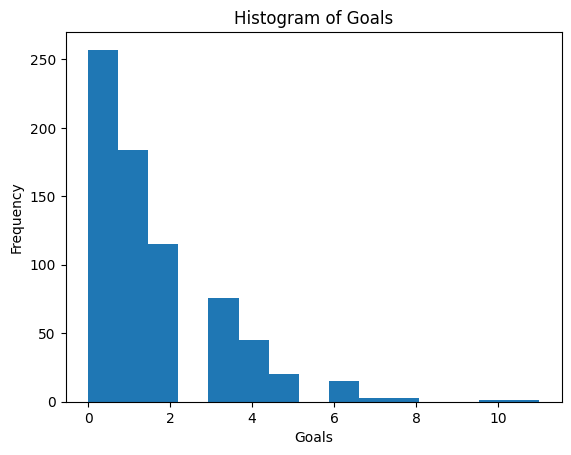

In [158]:
# Example histogram for Goals
plt.hist(df_5v5['Goals'], bins=15)
plt.title("Histogram of Goals")
plt.xlabel("Goals")
plt.ylabel("Frequency")
plt.show()


#### - Total Assists

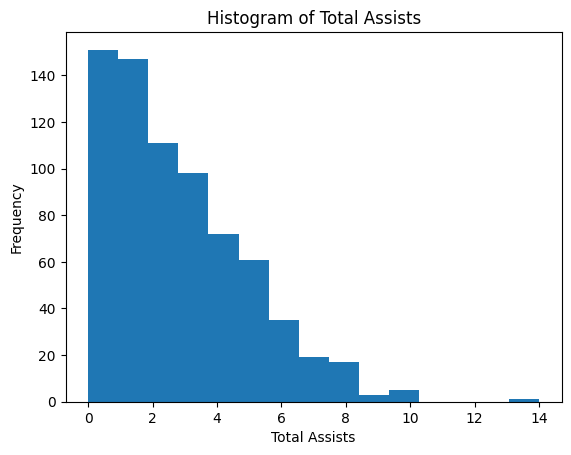

In [160]:
# Example histogram for Total Assists
plt.hist(df_5v5['Total Assists'], bins=15)
plt.title("Histogram of Total Assists")
plt.xlabel("Total Assists")
plt.ylabel("Frequency")
plt.show()

#### - Shots

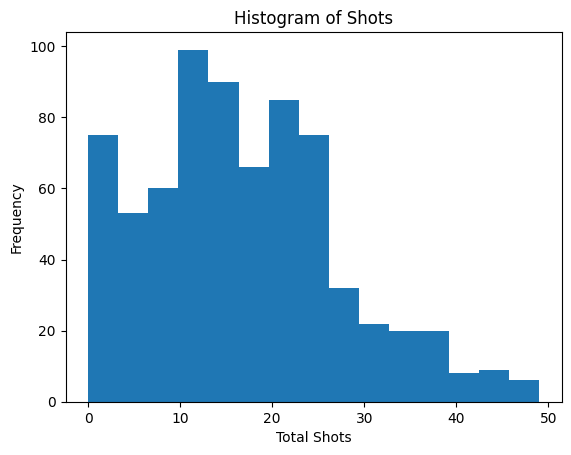

In [162]:
# Example histogram for Shots
plt.hist(df_5v5['Shots'], bins=15)
plt.title("Histogram of Shots")
plt.xlabel("Total Shots")
plt.ylabel("Frequency")
plt.show()

#### - TOI (Time on Ice)

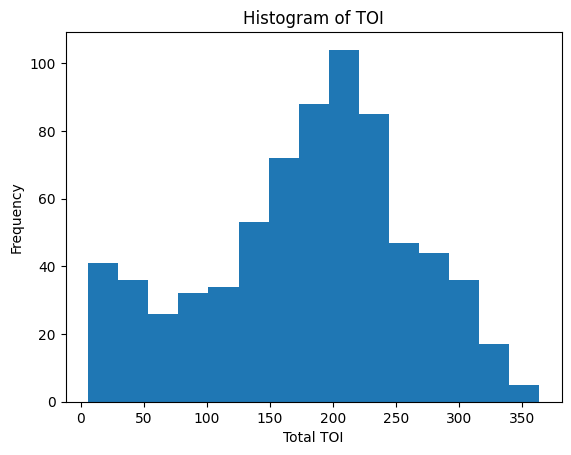

In [164]:
# Example histogram for TOI
plt.hist(df_5v5['TOI'], bins=15)
plt.title("Histogram of TOI")
plt.xlabel("Total TOI")
plt.ylabel("Frequency")
plt.show()

#### - Total Points

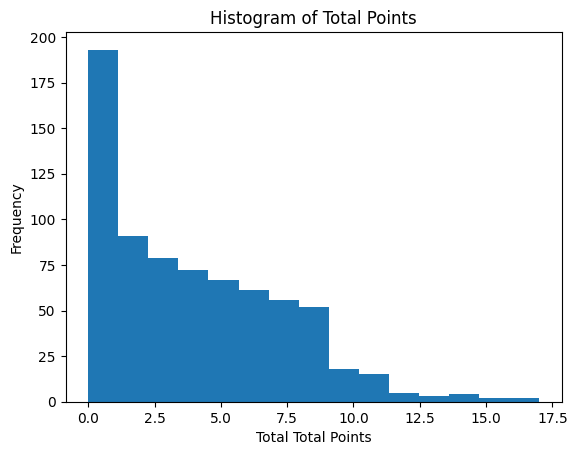

In [166]:
# Example histogram for Total Points
plt.hist(df_5v5['Total Points'], bins=15)
plt.title("Histogram of Total Points")
plt.xlabel("Total Total Points")
plt.ylabel("Frequency")
plt.show()

In [ ]:
### Descriptive Statistics: Mean, Mode, Spread, and Tails

In [168]:
df_5v5[['Goals', 'Total Assists', 'Shots', 'TOI', 'Total Points']].describe()


,Goals,Total Assists,Shots,TOI,Total Points
count,720.000000,720.000000,720.000000,720.000000,720.000000
mean,1.497222,2.536111,16.913889,179.855347,4.033333
std,1.681940,2.279821,10.424419,81.341636,3.258710
min,0.000000,0.000000,0.000000,5.933333,0.000000
25%,0.000000,1.000000,9.000000,130.283333,1.000000
50%,1.000000,2.000000,16.000000,191.541667,3.000000
75%,2.000000,4.000000,23.000000,233.883333,6.000000
max,11.000000,14.000000,49.000000,363.300000,17.000000


In [ ]:
Probability Mass Function (PMF)

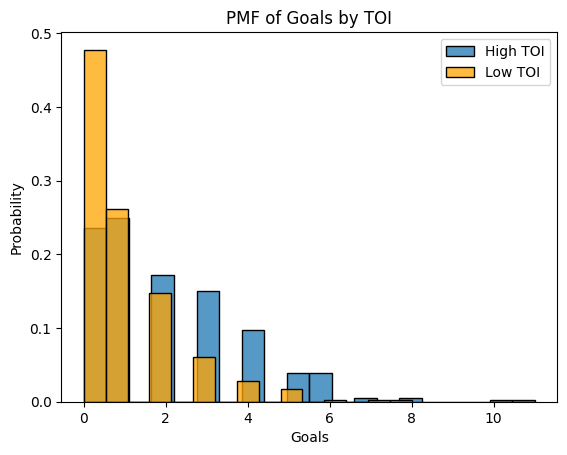

In [170]:
high_toi_goals = df_5v5[df_5v5['TOI'] > df_5v5['TOI'].median()]['Goals']
low_toi_goals = df_5v5[df_5v5['TOI'] <= df_5v5['TOI'].median()]['Goals']
sns.histplot(high_toi_goals, stat="probability", kde=False, label="High TOI")
sns.histplot(low_toi_goals, stat="probability", kde=False, color="orange", label="Low TOI")
plt.legend()
plt.title("PMF of Goals by TOI")
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.show()


### Cumulative Distribution Function (CDF)

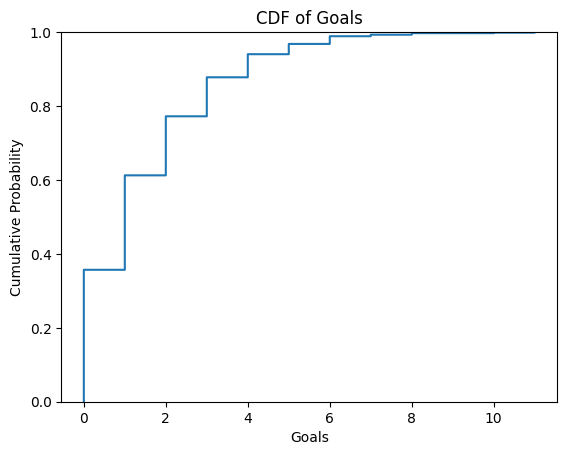

In [173]:
sns.ecdfplot(df_5v5['Goals'])
plt.title("CDF of Goals")
plt.xlabel("Goals")
plt.ylabel("Cumulative Probability")
plt.show()


### Analytical Distribution

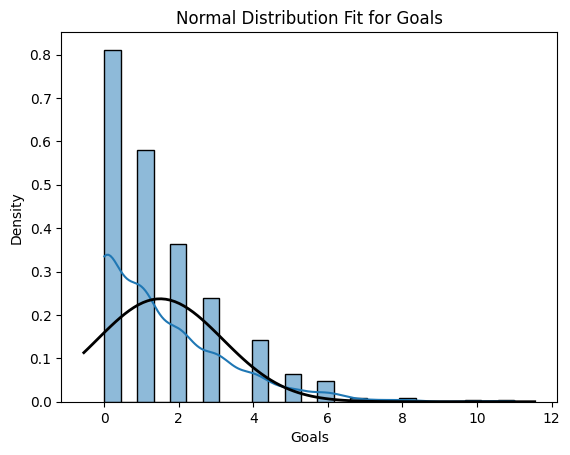

In [176]:
# Fit and plot a normal distribution for Goals
mean_goals = df_5v5['Goals'].mean()
std_goals = df_5v5['Goals'].std()
sns.histplot(df_5v5['Goals'], kde=True, stat="density")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean_goals, std_goals)
plt.plot(x, p, 'k', linewidth=2)
plt.title("Normal Distribution Fit for Goals")
plt.show()


### Correlation and Scatter Plots

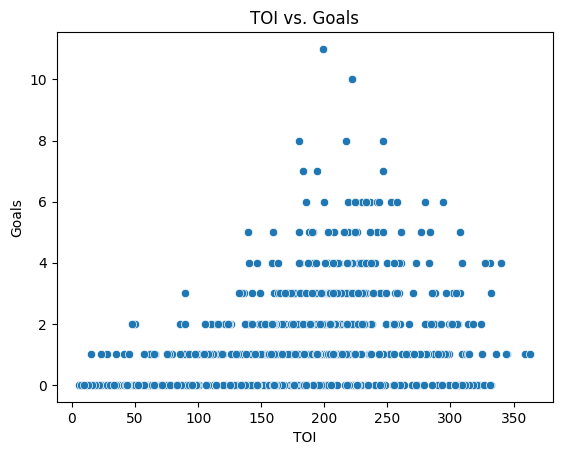

In [179]:
sns.scatterplot(x='TOI', y='Goals', data=df_5v5)
plt.title("TOI vs. Goals")
plt.xlabel("TOI")
plt.ylabel("Goals")
plt.show()


### Hypothesis Testing

In [182]:
high_toi = df_5v5[df_5v5['TOI'] > df_5v5['TOI'].median()]['Goals']
low_toi = df_5v5[df_5v5['TOI'] <= df_5v5['TOI'].median()]['Goals']
t_stat, p_val = stats.ttest_ind(high_toi, low_toi)
print(f"T-statistic: {t_stat}, p-value: {p_val}")


T-statistic: 8.451129445982144, p-value: 1.6008295836347821e-16


In [ ]:
### Regression Analysis

In [184]:
X = df_5v5[['TOI', 'Shots']]
y = df_5v5['Goals']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Goals   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     189.6
Date:                Sat, 16 Nov 2024   Prob (F-statistic):           7.98e-67
Time:                        15:02:47   Log-Likelihood:                -1242.7
No. Observations:                 720   AIC:                             2491.
Df Residuals:                     717   BIC:                             2505.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2158      0.123      1.751      0.0

# Final Write-Up: NHL Performance Analysis

## Statistical/Hypothetical Question
This project investigates how time on ice (TOI) impacts NHL player performance metrics, particularly focusing on goals and assists. The research question is: *Does increased TOI correlate with higher goals and assists, and to what extent can TOI predict player performance in these metrics?*

---

## Main Findings

- **Histograms**:  
  The histograms for the variables **Goals**, **Total Assists**, **Shots**, **TOI**, and **Total Points** revealed varying distributions. Goals and assists had a right-skewed distribution, indicating that most players scored relatively low on these metrics, with a few high performers skewing the data. TOI, by contrast, showed a more normal distribution, reflecting the average range of ice time most players received. Outliers were noted in **Shots** and **Total Points**, representing a few players with extreme values. Handling these outliers would depend on the analysis context, but they generally highlight exceptional players.

- **PMF (Probability Mass Function)**:  
  When comparing goals for players with high versus low TOI, the PMF showed that players with higher TOI tended to score more goals than those with lower TOI. This distribution difference suggests that additional playing time can provide players with more scoring opportunities, although this effect varies among players.

- **CDF (Cumulative Distribution Function)**:  
  The CDF for **Goals** indicated that a significant majority of players scored below a particular goal threshold, with only a small proportion achieving higher totals. This finding aligns with the league-wide observation that top goal scorers represent a limited subset of the player population.

- **Correlation and Regression Analysis**:  
  The scatter plots and correlation matrix revealed a positive correlation between TOI and both **Goals** and **Total Assists**, with **Shots** also correlating positively with these metrics. Regression analysis further quantified these relationships, showing that both TOI and Shots were significant predictors of goals. The regression model’s R-squared value suggested that TOI and Shots together explain a notable portion of the variance in goals, supporting the hypothesis that TOI significantly impacts scoring.

---

## Challenges
A limitation of this analysis was the absence of a home/away game indicator, which would have allowed for more nuanced insights into how venue factors influence player performance. Additionally, while most variables were well-distributed, the presence of outliers in shots and points indicated a few standout players who skewed the data distribution. Including more variables, such as power play time, could further refine the model.

---

## Insights and Future Steps
This analysis highlighted that TOI is indeed a critical factor in player performance, reinforcing the importance of playing time in sports analytics. The findings suggest that players with more ice time tend to achieve higher scores, although this effect varies by position and individual skill level. Future analysis could incorporate additional variables like power play time or player fatigue metrics to deepen understanding. Expanding the dataset to include home/away splits would also allow for a more detailed exploration of contextual factors affecting performance.
